## Exploratory Data Analysis 
- In this part of the project we see, visualise and plot the data. This is one of the first steps done during data analysis.

### Why do we need this ?
To understand any problems in the data like missing values, errors, any duplicates or outliers present within the data.


In [48]:
import pandas as pd, numpy as np ,seaborn as sns, matplotlib.pyplot as plt
df= pd.read_csv("Customer Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Changed the blank values with 0 as the Tenure period so far is 0, hence no total charges were recorded.

In [50]:
df['TotalCharges'] = df['TotalCharges'].replace(" ",0)
df['TotalCharges'] = df['TotalCharges'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [51]:
df.isnull().sum().sum()

0

In [52]:
df["customerID"].duplicated().sum()

0

## Conversion of Value

Here, I have converted the senior citizen column to contain yes/no value 

In [53]:
def convert_type(value):
    if value==1:
        return "yes"
    else:
        return "no"

df['SeniorCitizen']=df['SeniorCitizen'].apply(convert_type)

In [54]:
df.head(21)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,no,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,no,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,no,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,no,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,no,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [55]:
senior_rows= df[df['SeniorCitizen'].eq('yes')]
print(senior_rows)

      customerID  gender SeniorCitizen Partner Dependents  tenure  \
20    8779-QRDMV    Male           yes      No         No       1   
30    3841-NFECX  Female           yes     Yes         No      71   
31    4929-XIHVW    Male           yes     Yes         No       2   
34    3413-BMNZE    Male           yes      No         No       1   
50    8012-SOUDQ  Female           yes      No         No      43   
...          ...     ...           ...     ...        ...     ...   
7023  1035-IPQPU  Female           yes     Yes         No      63   
7029  2235-DWLJU  Female           yes      No         No       6   
7031  3605-JISKB    Male           yes     Yes         No      55   
7032  6894-LFHLY    Male           yes      No         No       1   
7041  8361-LTMKD    Male           yes     Yes         No       4   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
20             No  No phone service             DSL             No  ...   
30            Yes    

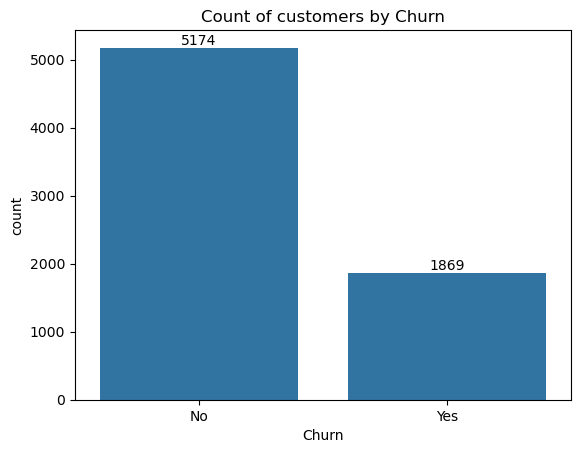

In [56]:

ax=sns.countplot(x='Churn',data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of customers by Churn")
plt.show()

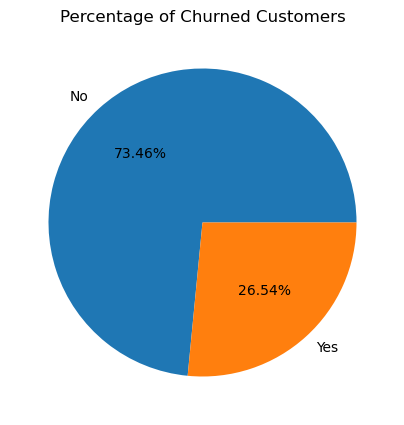

In [57]:
plt.figure(figsize=(5,5))
gb= df.groupby("Churn").agg({'Churn':'count'})
plt.pie(gb['Churn'], labels=gb.index, autopct="%1.2f%%")
plt.title("Percentage of Churned Customers")
plt.show()

# Conclusion so far 
26.54% of our customers have churned out of the services, moving forward to the reason of this.

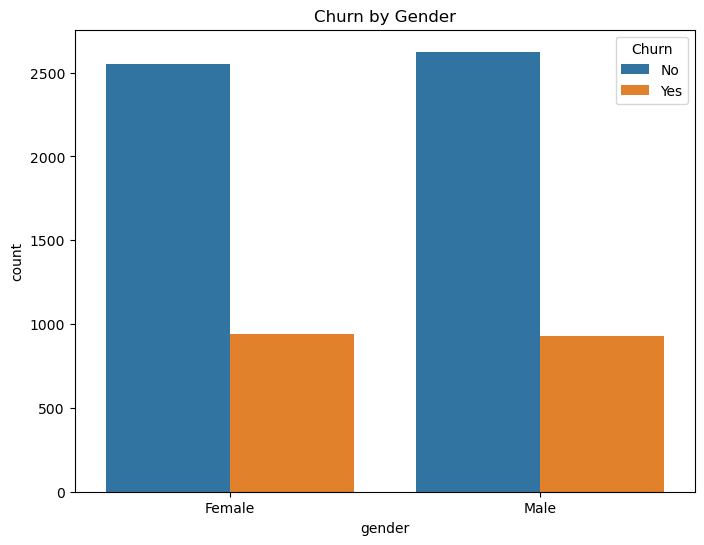

In [58]:
plt.figure(figsize=(8,6))
sns.countplot(x="gender",data=df, hue='Churn')
plt.title("Churn by Gender")
plt.show()

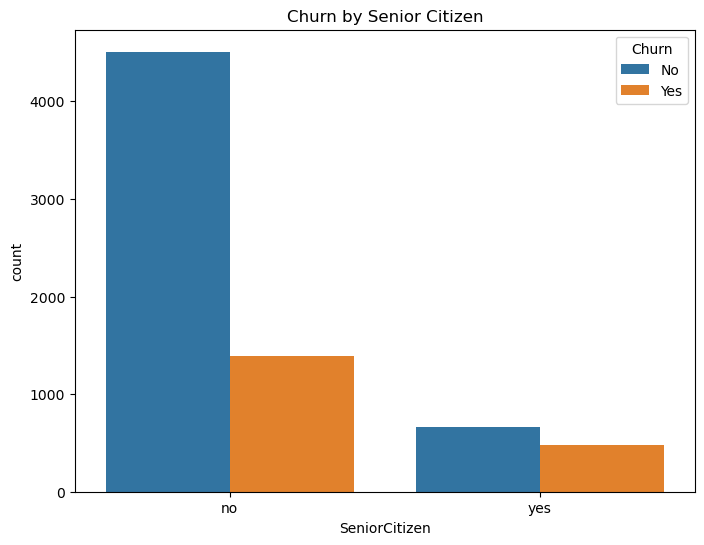

In [59]:
plt.figure(figsize=(8,6))
sns.countplot(x="SeniorCitizen",data=df, hue='Churn')
plt.title("Churn by Senior Citizen")
plt.show()

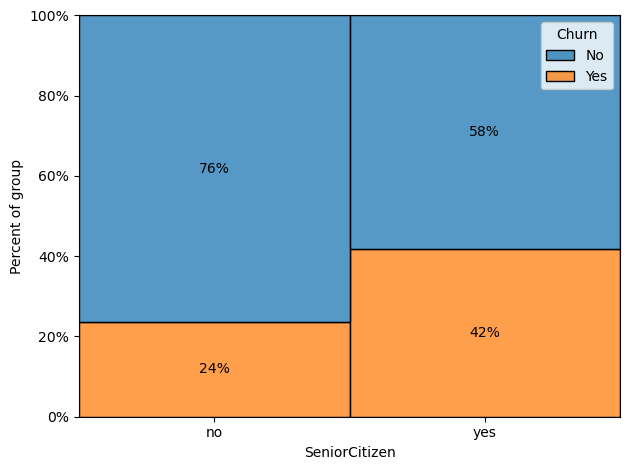

In [60]:
import matplotlib.ticker as mtick
ax = sns.histplot(
    data=df, x='SeniorCitizen', hue='Churn',
    multiple='fill', stat='proportion', discrete=True
)

for c in ax.containers:
    heights = [p.get_height() for p in c]                
    labels  = [f'{h*100:.0f}%' if h > 0 else '' for h in heights]
    ax.bar_label(c, labels=labels, label_type='center', fontsize=10)

# Y-axis as 0–100%
ax.set_ylim(0, 1)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
ax.set_ylabel('Percent of group')
plt.tight_layout(); plt.show()

## Duration of Churn 
People who have used the service for a larger duration of time have not churned out, otherwise in early stages the churn out was maximum for most customers. It is also observed that people who have a longer contract tend to churn in a significantly lower amount as compared to people who opted for a longer duration of plans.

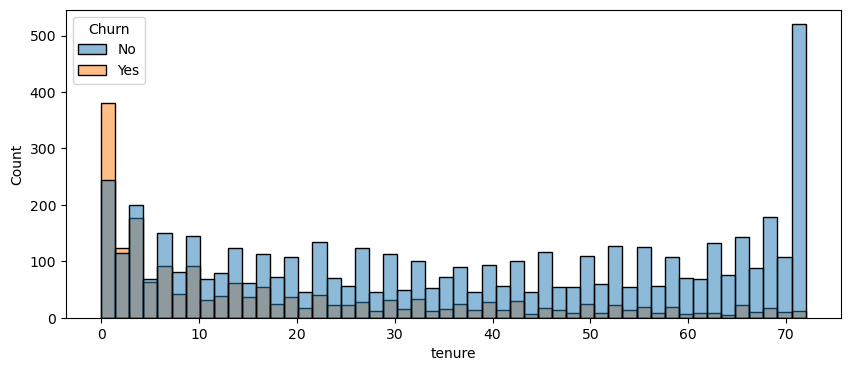

In [61]:
plt.figure(figsize=(10,4))
sns.histplot(x="tenure", data=df, bins=50, hue="Churn")
plt.show()

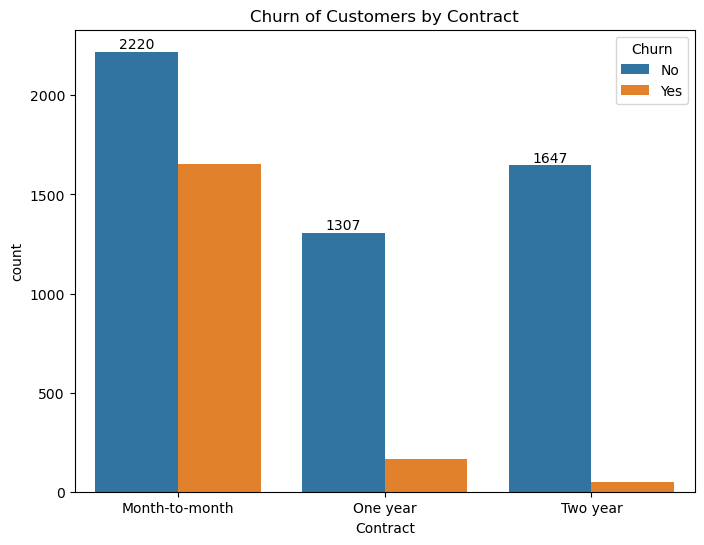

In [62]:
plt.figure(figsize=(8,6))
ax=sns.countplot(x="Contract",data=df, hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Churn of Customers by Contract")
plt.show()

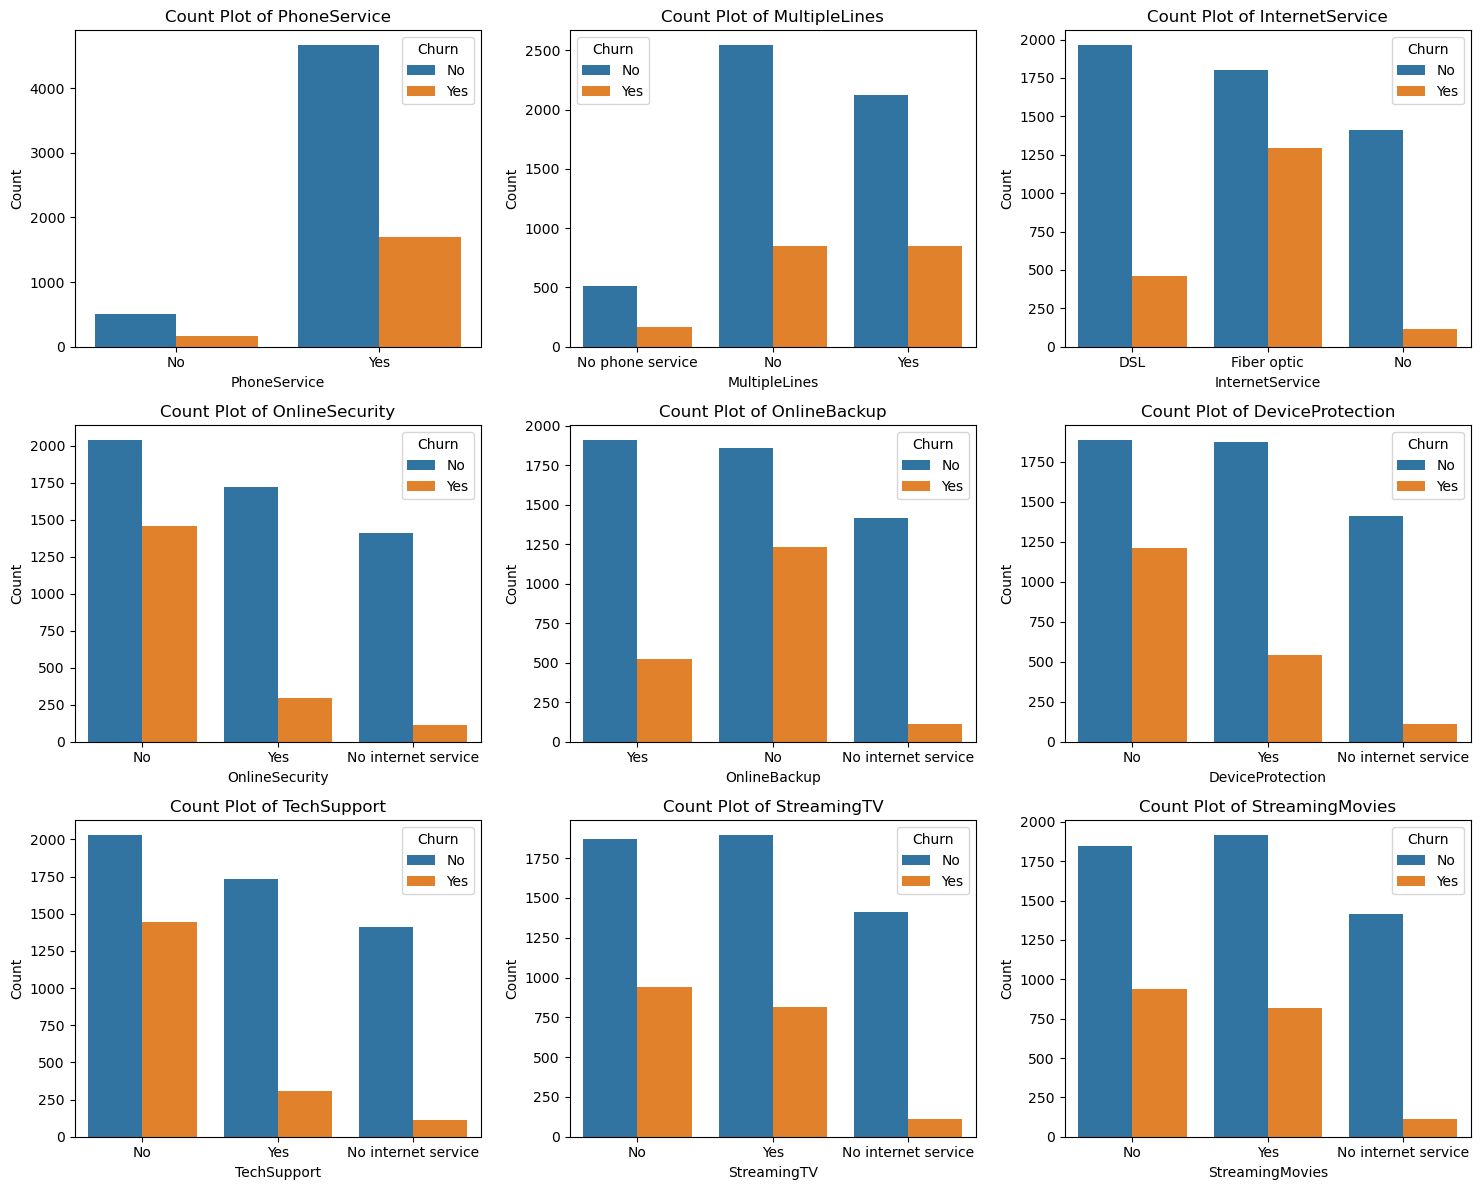

In [63]:
df.columns.values
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols  
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4)) 


axes = axes.flatten()

for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue = df["Churn"])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

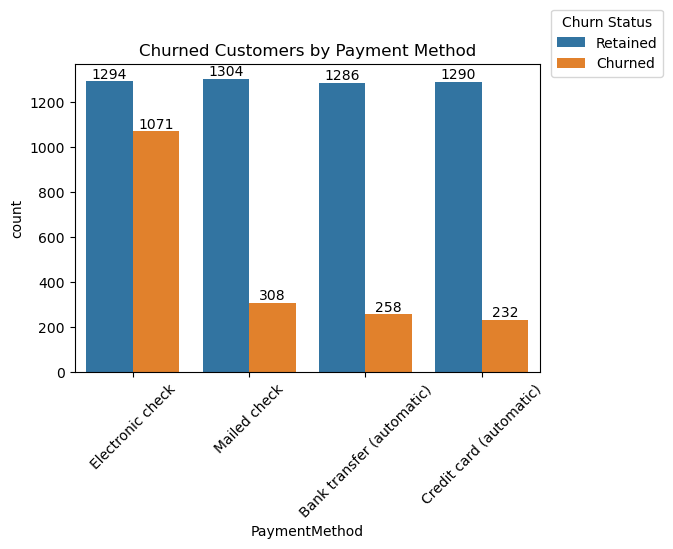

In [81]:
from turtle import title


plt.figure(figsize = (6,4))
ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn")

for label in ax.containers:
    ax.bar_label(label)

plt.title("Churned Customers by Payment Method")
plt.xticks(rotation = 45)

handles, labels= ax.get_legend_handles_labels()
label_map={'No':'Retained', 'Yes':'Churned'}
new_labels= [label_map.get(l,l) for l in labels]

ax.legend(handles, new_labels, title= 'Churn Status', loc='upper left', bbox_to_anchor=(1.01,1.2))

plt.show()